Nama: Amario Fausta <br>
NIM: 1306619051 <br>
Fisika B 2019

### Tugas 4 Pengolahan Citra Digital

#### Mengimport library yang dibutuhkan

In [ ]:
from skimage import io ##Library untuk menampilkan citra
import numpy as np
from google.colab import drive ##Library untuk menghubungkan program ke google drive
drive.mount('/content/drives/') ##Proses untuk menghubungkan program ke google drive
import matplotlib.pyplot as plt
from skimage.color import rgb2gray ##Library untuk mengubah citra rbg ke grayscale
import cv2 as cv
from PIL import Image ##Kumpulan library untuk memberikan efek pada citra
from PIL import ImageFilter ##Library ubtuk memberikan filter pada citra

Drive already mounted at /content/drives/; to attempt to forcibly remount, call drive.mount("/content/drives/", force_remount=True).


#### Konversi Citra yang Akan Diolah Menjadi Grayscale

In [ ]:
img = io.imread('/content/petani.jpeg') #Gambar Utama
img_gry = rgb2gray(img) #Gray dengan Skimage
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #Gray dengan CV
ret, img_BnW = cv.threshold(img_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU) #BW dengan CV
print ('Dimensi gambar')
print (img.shape)
print (img_gry.shape)
print (img_gray.shape)

Dimensi gambar
(225, 225, 3)
(225, 225)
(225, 225)


#### Menampilkan citra sebelum diterapkan filter

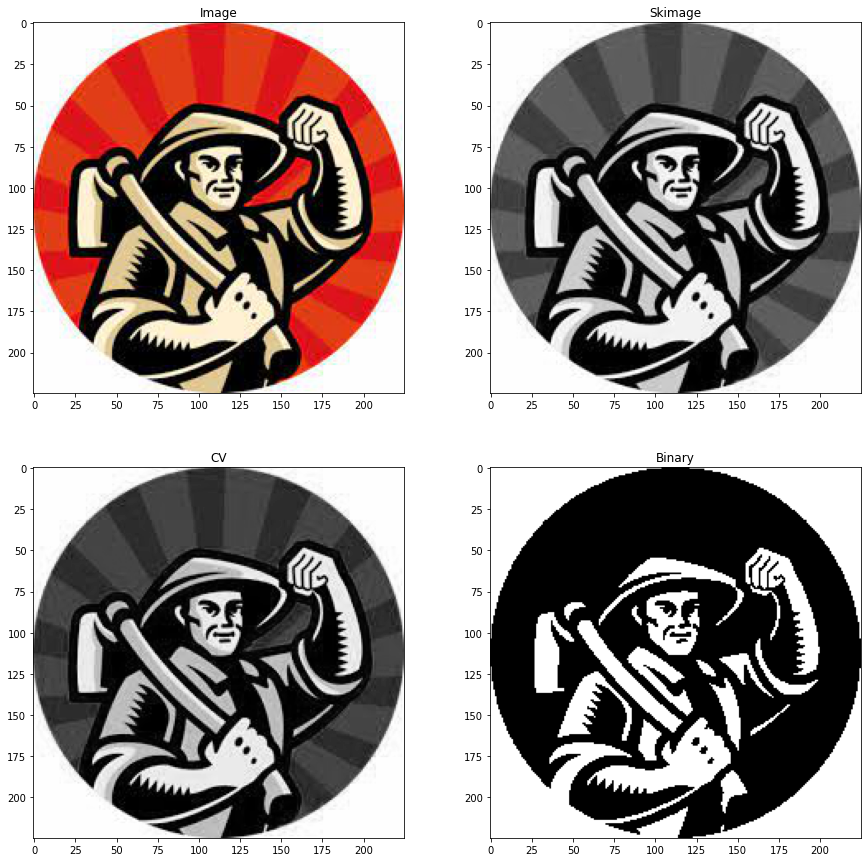

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img)
plt.title('Image')

plt.subplot(222)
plt.imshow(img_gry,cmap=plt.get_cmap('gray'))
plt.title('Skimage')

plt.subplot(223)
plt.imshow(img_gray,cmap=plt.get_cmap('gray'))
plt.title('CV')

plt.subplot(224)
plt.imshow(img_BnW,'gray')
plt.title('Binary')
plt.show()

#### Mengubah kecerahan citra

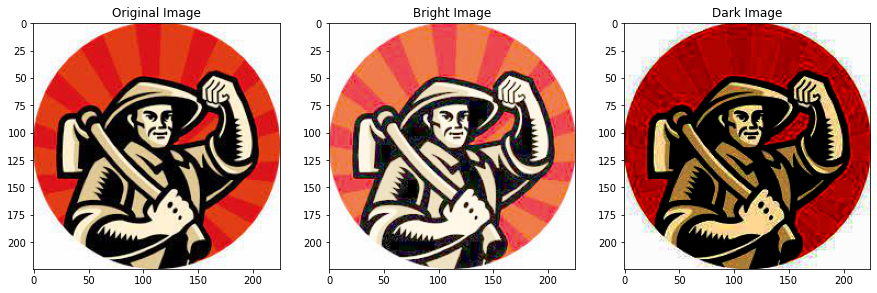

In [ ]:
from skimage import exposure ##Library untuk mengubah kecerahan citra

image_bright = exposure.adjust_gamma(img, gamma=0.5,gain=1) ##Mengatur tingkat kecerahan untuk citra
image_dark = exposure.adjust_gamma(img, gamma=3,gain=1) ##Mengatur tingkat kecerahan untuk citra

# plotting images
plt.figure(figsize=(15, 15))
plt.subplot(131),
plt.imshow(img)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(image_bright)
plt.title('Bright Image')

plt.subplot(133)
plt.imshow(image_dark)
plt.title('Dark Image')

plt.show()

#### Mengetahui histogram untuk citra

Text(0.5, 1.0, 'Histogram Citra Gelap')

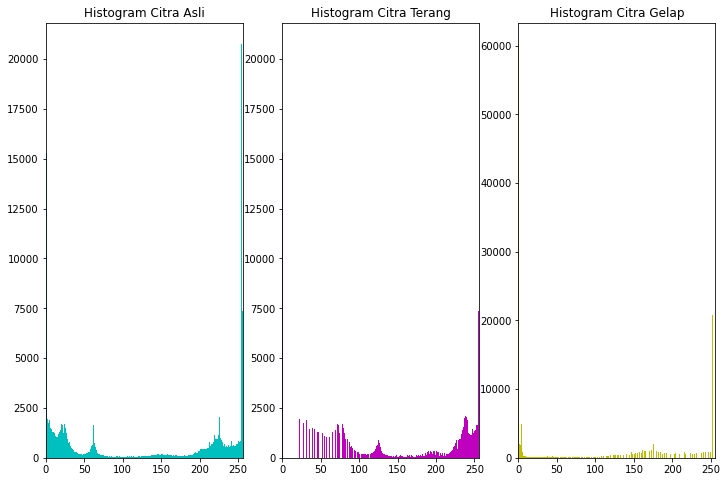

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.hist(img.flatten(),256,[0,256], color = 'c')
plt.xlim([0,256])
plt.title('Histogram Citra Asli')

plt.subplot(132)
plt.hist(image_bright.flatten(),256,[0,256], color = 'm')
plt.xlim([0,256])
plt.title('Histogram Citra Terang')

plt.subplot(133)
plt.hist(image_dark.flatten(),256,[0,256], color = 'y')
plt.xlim([0,256])
plt.title('Histogram Citra Gelap')

#### Memberikan efek negatif pada citra

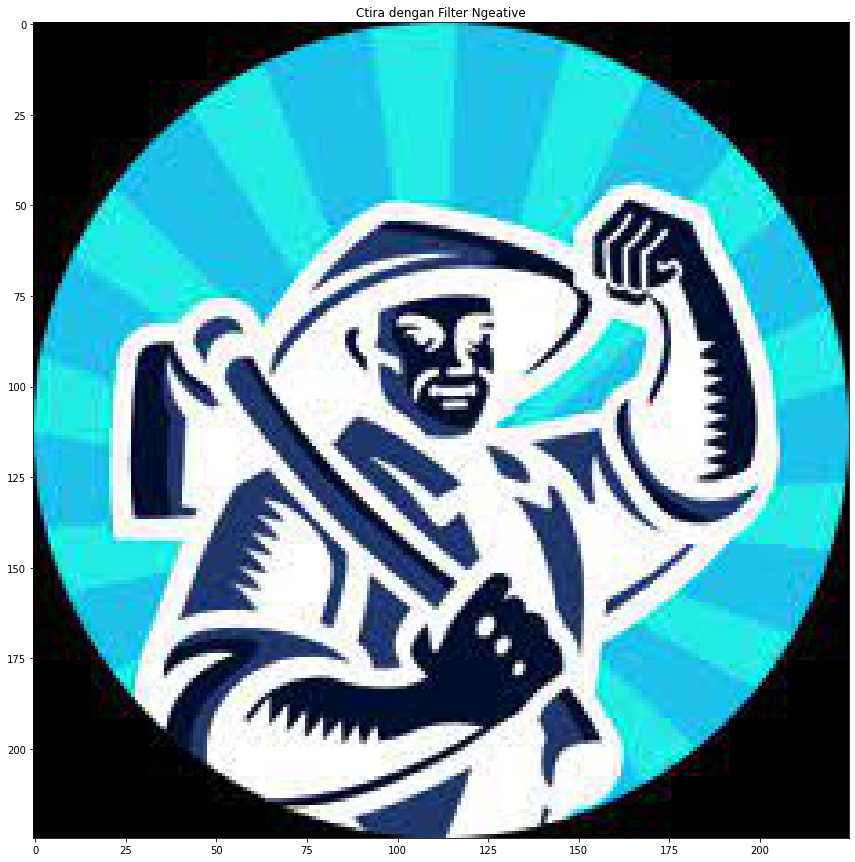

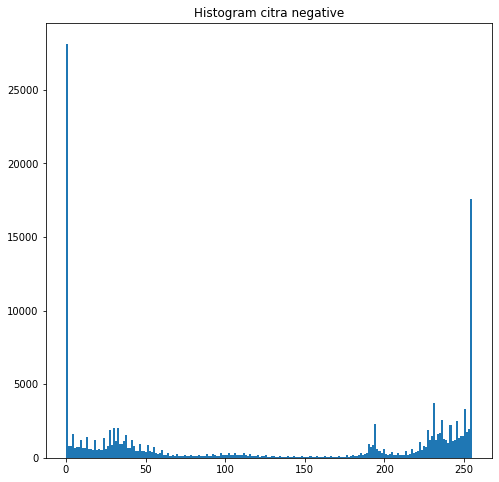

In [ ]:
from skimage.io import imread, imshow ##Library untuk menampilkan citra
image = imread('/content/petani.jpeg')
negative = 255 - image ##Proses untuk mengubah citra menjadi negative
plt.figure(figsize=(15, 15))
plt.title('Ctira dengan Filter Ngeative')
plt.imshow(negative, cmap='gray')

#Menampilkan histogram citra negative
plt.figure(figsize=(8, 8))
plt.hist(negative.ravel(), bins=200)
plt.title('Histogram citra negative')
plt.show()

#### Memberikan filter Noise Citra dengan Gauss dan Median

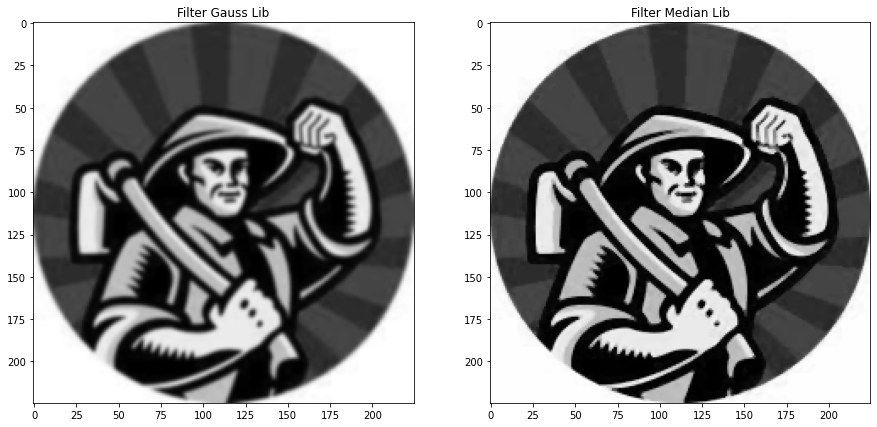

In [ ]:
from skimage.filters import gaussian ##Library untuk memanggil filter gaussian
from skimage.filters.rank import mean, median ##Library untuk memanggil filter mean, median

#Filter Median Library
img_medianlib = median(img_gray)

#Filter Gaussian Library
img_gausslib = gaussian(img_gray)

#Plotting Filter Gauss Lib
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(img_gausslib,cmap=plt.get_cmap('gray'))
plt.title ("Filter Gauss Lib")

#Plotting Filter Median Lib
plt.subplot(122)
plt.imshow(img_medianlib,cmap=plt.get_cmap('gray'))
plt.title('Filter Median Lib')
plt.show()

#### Mendefinisikan Filter Horizontal dan Filter Vertikal Sobel

In [ ]:
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]
horizontal_filter = [[-1,0,1],[-2,0,2],[-1,0,1]]
n,m,d = img.shape

#### Mengaplikasikan citra dengan Filter Vertikal

Text(0.5, 1.0, 'Gambar dengan Filter Vertikal')

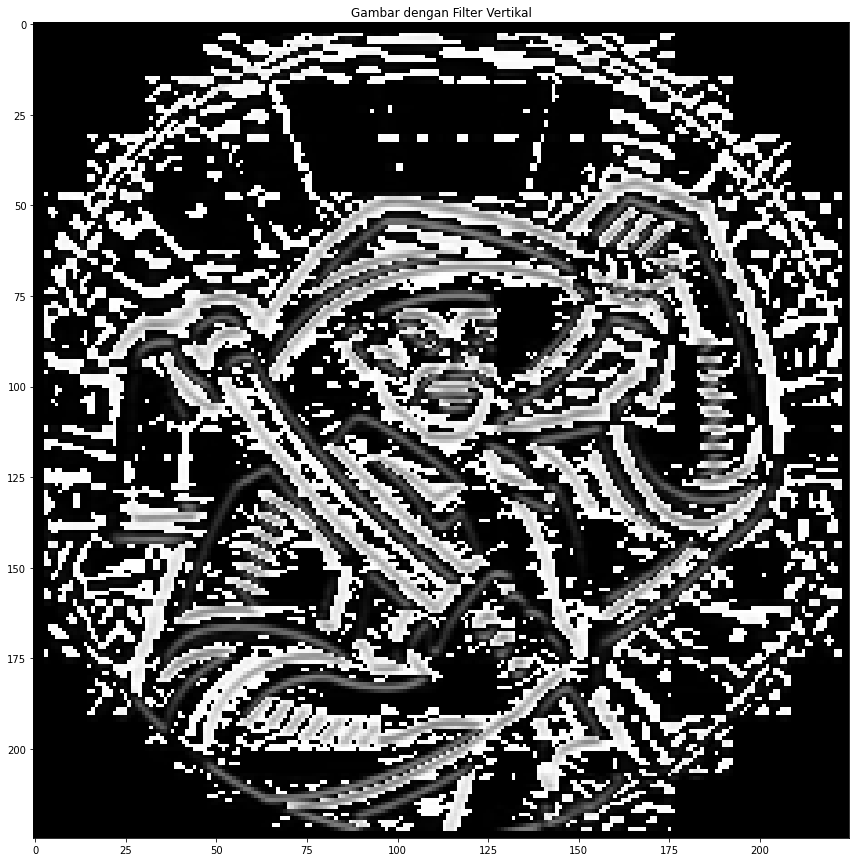

In [ ]:
vertical_edges_img = np.zeros_like(img)
for row in range(3, n-2):
  for col in range(3,m-2):
    local_pixels = img[row-1:row+2, col-1:col+2, 0]
    transformed_pixels = vertical_filter*local_pixels
    vertical_score = (transformed_pixels.sum() +4)/8
    vertical_edges_img[row, col] = [vertical_score]*3

#Menampilkan Filter Vertikal
plt.figure(figsize=(15, 15))
plt.imshow(vertical_edges_img)
plt.title("Gambar dengan Filter Vertikal")

#### Mengaplikasikan citra dengan Filter Horizontal

Text(0.5, 1.0, 'Gambar dengan Filter Horizontal')

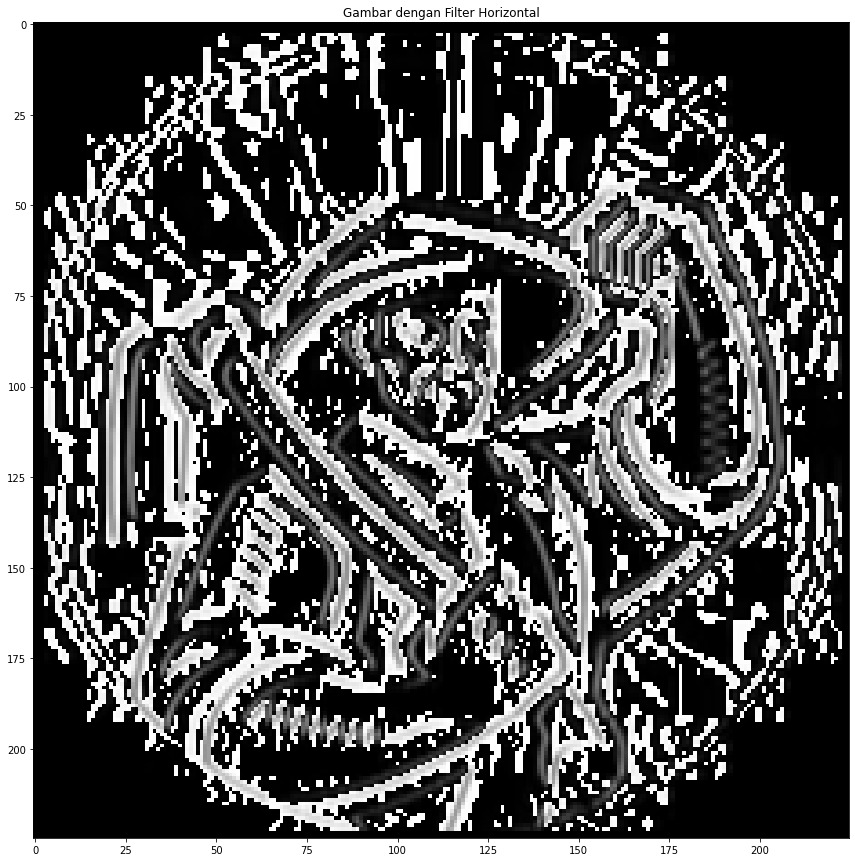

In [ ]:
horizontal_edges_img = np.zeros_like(img)
for row in range(3, n-2):
  for col in range(3,m-2):
    local_pixels = img[row-1:row+2, col-1:col+2, 0]
    transformed_pixels = horizontal_filter*local_pixels
    horizontal_score = (transformed_pixels.sum() +4)/8
    horizontal_edges_img[row, col] = [horizontal_score]*3

#Menampilkan Filter Horizontal
plt.figure(figsize=(15, 15))
plt.imshow(horizontal_edges_img)
plt.title("Gambar dengan Filter Horizontal")

#### Menyatukan Filter Vertikal dan Filter Horizontal (Edges Detection)

Text(0.5, 1.0, 'Gambar dengan Edges Detection')

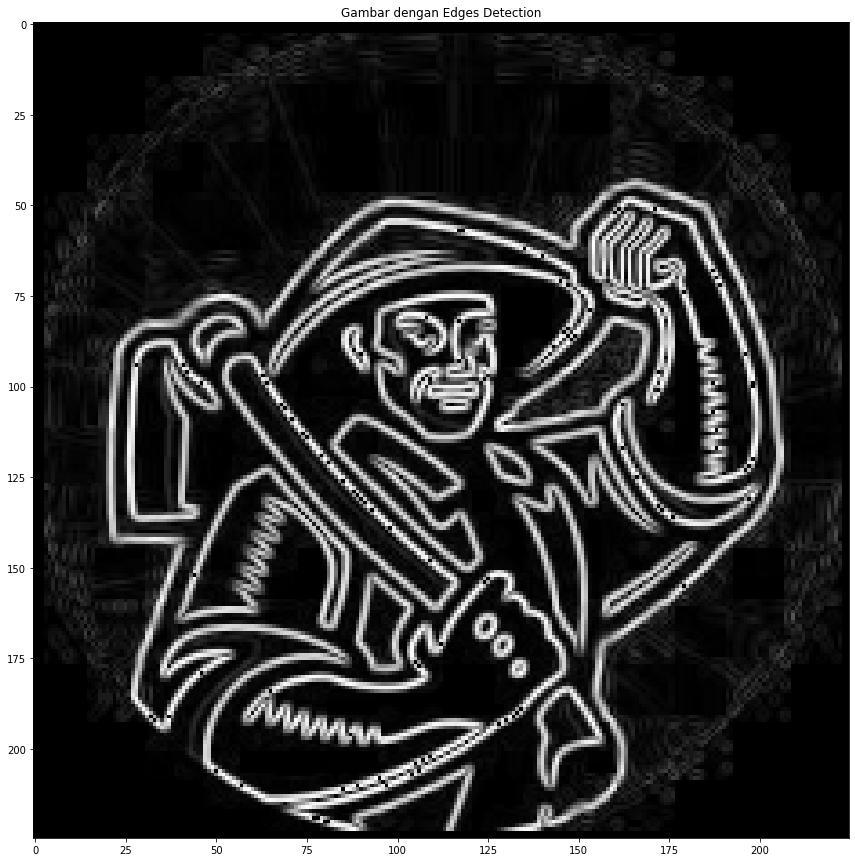

In [ ]:
edges_img = np.zeros_like(img)
for row in range(3, n-2):
  for col in range(3, m-2):
    local_pixels = img[row-1:row+2, col-1:col+2, 0]

    vertical_transformed_pixels = vertical_filter*local_pixels
    vertical_score = vertical_transformed_pixels.sum()/4

    horizontal_transformed_pixels = horizontal_filter*local_pixels
    horizontal_score = horizontal_transformed_pixels.sum()/4

    edge_score = (vertical_score**2 + horizontal_score**2)**.5
    edges_img[row, col] = [edge_score]*3
edges_img = edges_img/edges_img.max()

#Menampilkan Kedua Filter Gambar
plt.figure(figsize=(15, 15))
plt.imshow(edges_img)
plt.title("Gambar dengan Edges Detection")